## Car price prediction 

In [1]:
## importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
## reading the data

df=pd.read_csv('car_pricing.csv')

In [3]:
## calling top 5 rows for observing manually
df.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df.shape

(4345, 9)

# Missing Values and Handling it

In [5]:
## To list the features having missing values 

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

## To print the features name with percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(),2),"%  missing values|")

Price 0.04 %  missing values|
EngineV 0.03 %  missing values|


In [6]:
np.count_nonzero(df['Mileage']==0)

185

1. Price is having missing values of 0.04%, and replcaing it would effect the accuracy of model. 
2. EngineV is having missing values of 0.03%, and cant replce it.
3. Millage can be replaced by its mean.

We are loosing very small amount of data, which shouldnt be rplaced.

In [7]:
df1=df

In [8]:
## fill as Nan wherever the value is 0.

df1.loc[df1['Mileage'] == 0,'Mileage'] = np.nan

In [9]:
## replace the Nan value with mean of Mileage.

df1['Mileage'] = df1['Mileage'].fillna(np.mean(df['Mileage']))

In [10]:
## convert to int type

df1['Mileage']=(df1['Mileage'].apply(int))

In [11]:
## drop remaining Nan values from data.

df1=df1.dropna()

In [12]:
## convert to int type.

df1['Price']=(df1['Price'].apply(int))

<ipython-input-12-55be7478e7d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price']=(df1['Price'].apply(int))


In [13]:
## shape of cleaned data.

df1.shape

(4025, 9)

# Data Analysis

In [14]:
## looking for correlation bet features.

df.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.356164,0.058664,0.487031
Mileage,-0.356164,1.000000,0.022215,-0.608856
EngineV,0.058664,0.022215,1.000000,-0.022866
Year,0.487031,-0.608856,-0.022866,1.000000


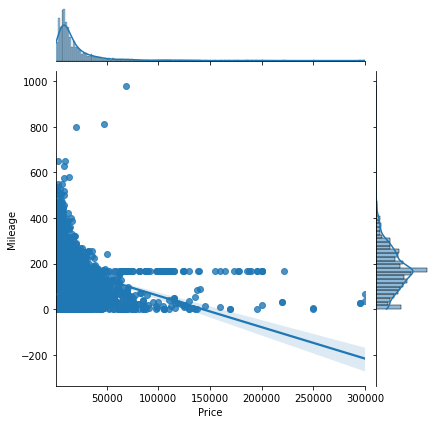

In [15]:
## relation bet price and mileage 

sns.jointplot(x='Price',y='Mileage',data=df1,kind='reg')

From the graph we can say that, Mileage below 200 are sold the most at the price of 75k

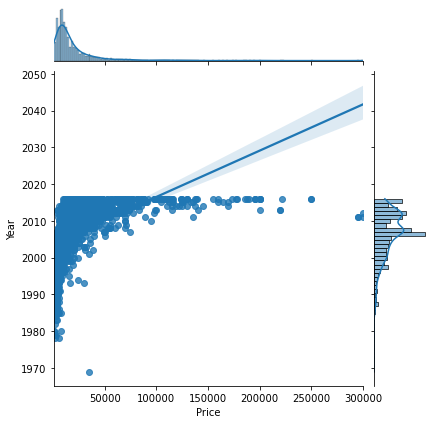

In [16]:
## relation bet price and year.

sns.jointplot(x='Price',y='Year',data=df1,kind='reg')

The sales is increasing exponentially and the price as well.By this we can say that cars requirements wil be going high in future days

C:\Users\guess\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

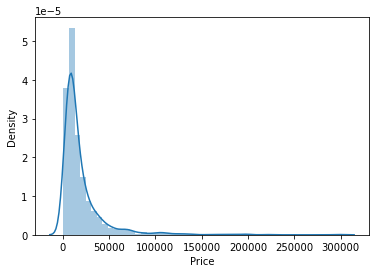

In [17]:
## highest range of price sales.

sns.distplot(df1['Price'])

C:\Users\guess\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

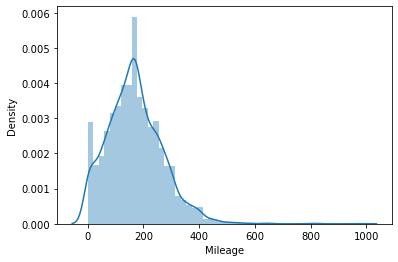

In [18]:
## highest range of Mileage among the sold cars.

sns.distplot(df1['Mileage'])

<AxesSubplot:xlabel='Body', ylabel='count'>

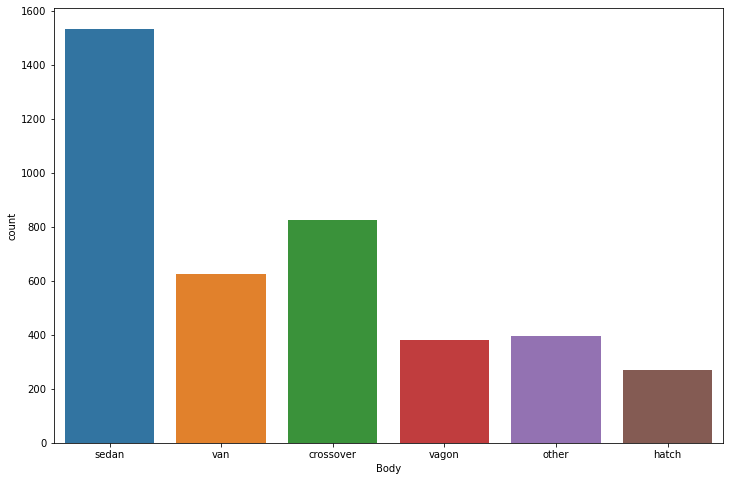

In [19]:
## car body based sales.

plt.figure(figsize=(12,8))
sns.countplot(x="Body", data=df1)

Sedan body type are sold the  most amongst the data.

<AxesSubplot:xlabel='Brand', ylabel='Price'>

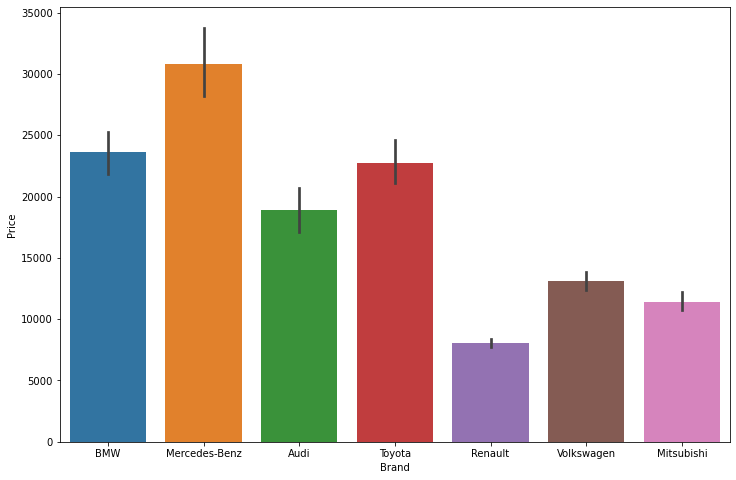

In [20]:
## brand counts.

plt.figure(figsize=(12,8))
sns.barplot(x='Brand',y='Price',data=df1)


Mercedes-Benz beand is sold highest comparitevly 

C:\Users\guess\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine Type', ylabel='count'>

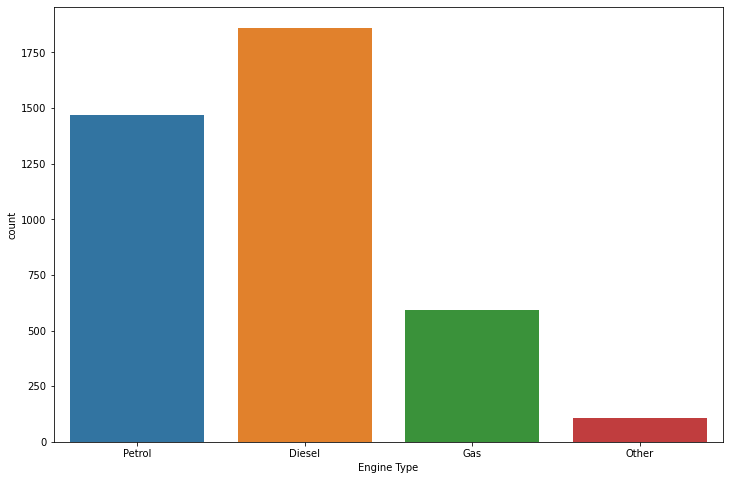

In [21]:
## Engine type count.

plt.figure(figsize=(12,8))
sns.countplot(df1['Engine Type'])

Diesel engines type are highest sold.

In [22]:
## numerically count of engine types.

df['Engine Type'].value_counts()

Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: Engine Type, dtype: int64

C:\Users\guess\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Registration', ylabel='count'>

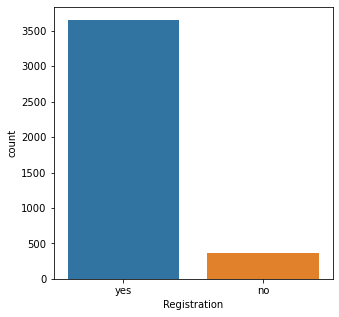

In [23]:
## count of Registration.

plt.figure(figsize=(5,5))
sns.countplot(df1['Registration'])

In [24]:
## Registration count in numbers 

df['Registration'].value_counts()

yes    3947
no      398
Name: Registration, dtype: int64

diesel engine are prefered more 

C:\Users\guess\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

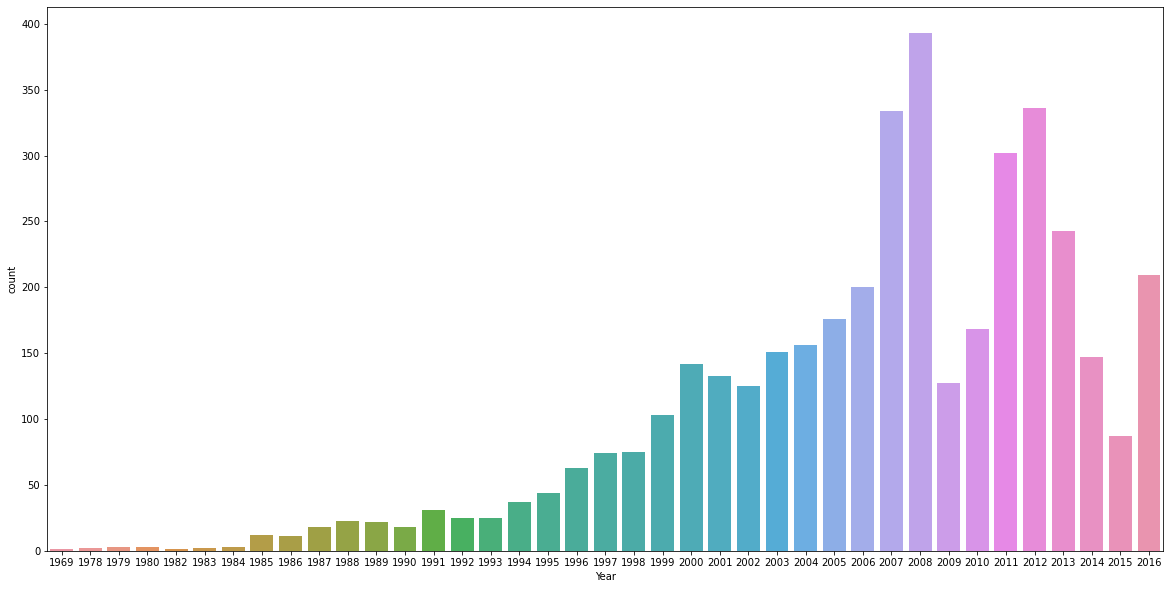

In [25]:
## comparision of sales among years.

plt.figure(figsize=(20,10))
sns.countplot(df1['Year'])

2018 was the best year in sales so far, followed by years 2012,2007 and 2011

Top_sales = df1['Year'].value_counts()>250
print(Top_sales) if count>250:

C:\Users\guess\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EngineV', ylabel='count'>

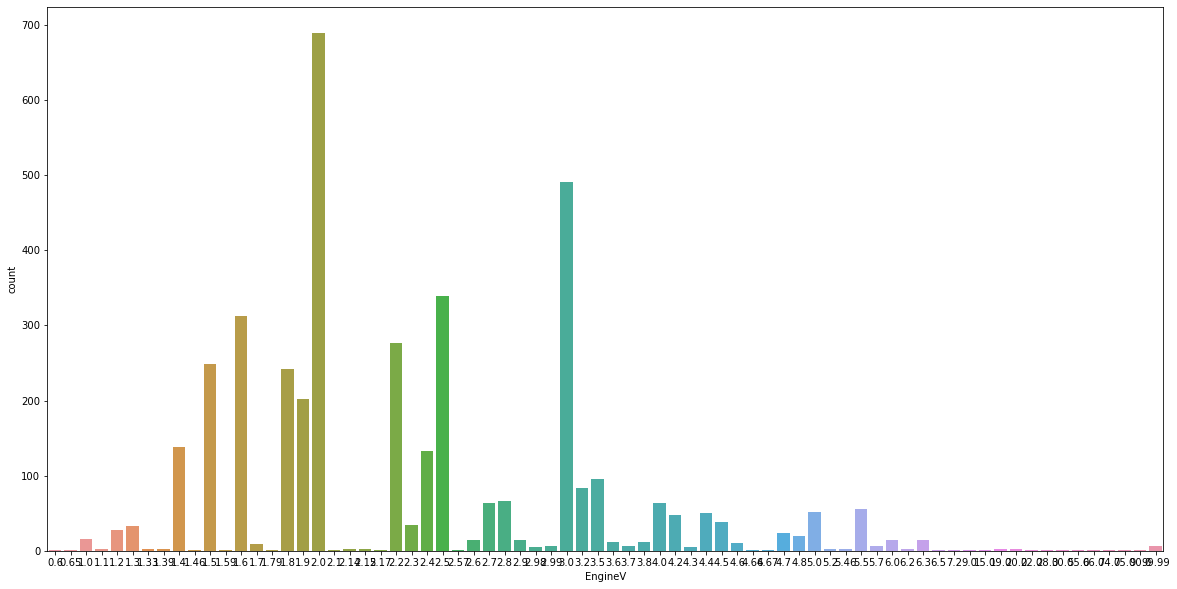

In [26]:
## counts of type of engine sold 

plt.figure(figsize=(20,10))
sns.countplot(df1['EngineV'])

EngineV 2.0 are the most the sold (almost 690)

In [27]:
## count in number of brands sold.

df1['Brand'].value_counts()

Volkswagen       880
Mercedes-Benz    823
BMW              640
Toyota           510
Renault          445
Audi             420
Mitsubishi       307
Name: Brand, dtype: int64

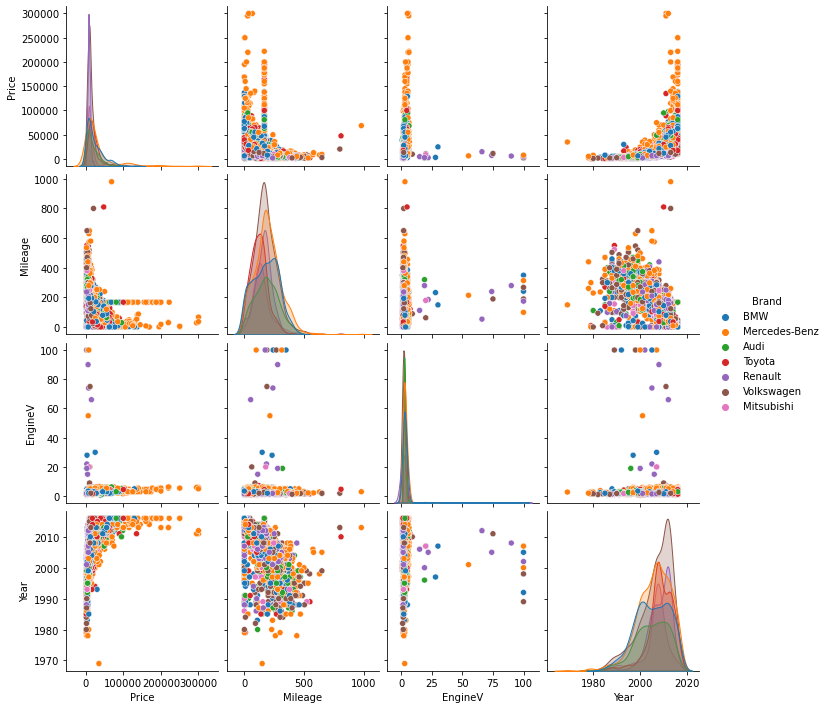

In [28]:
## representing the brand wrt price mileage engine and year

sns.pairplot(df1,hue='Brand')

In [29]:
## central tendency.

df1.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.301863,169.707826,2.764586,2006.379627
std,25815.734905,98.367230,4.935941,6.695595
min,600.000000,1.000000,0.600000,1969.000000
25%,6999.000000,100.000000,1.800000,2003.000000
50%,11500.000000,167.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# Data Preperation

In [30]:
df1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [31]:
## import preprocessing from sklearn.
## select dtype object from data.

from sklearn import preprocessing

df1_categorical = df1.select_dtypes(include=['object'])
df1_categorical.head()

,Brand,Body,Engine Type,Registration,Model
0,BMW,sedan,Petrol,yes,320
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212
2,Mercedes-Benz,sedan,Gas,yes,S 500
3,Audi,crossover,Petrol,yes,Q7
4,Toyota,crossover,Petrol,yes,Rav 4


In [32]:
## apply label encoding to dtype object features.

le = preprocessing.LabelEncoder()
df1_categorical = df1_categorical.apply(le.fit_transform)
df1_categorical.head()

,Brand,Body,Engine Type,Registration,Model
0,1,3,3,1,18
1,2,5,0,1,261
2,2,3,1,1,232
3,0,0,3,1,219
4,5,0,3,1,222


In [33]:
## drop features and concat encoded columns.

df1 = df1.drop(df1_categorical.columns, axis=1)
df1 = pd.concat([df1, df1_categorical], axis=1)
df1.head()

,Price,Mileage,EngineV,Year,Brand,Body,Engine Type,Registration,Model
0,4200,277,2.0,1991,1,3,3,1,18
1,7900,427,2.9,1999,2,5,0,1,261
2,13300,358,5.0,2003,2,3,1,1,232
3,23000,240,4.2,2007,0,0,3,1,219
4,18300,120,2.0,2011,5,0,3,1,222


In [34]:
## info of the processed data.

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         4025 non-null   int64  
 1   Mileage       4025 non-null   int64  
 2   EngineV       4025 non-null   float64
 3   Year          4025 non-null   int64  
 4   Brand         4025 non-null   int32  
 5   Body          4025 non-null   int32  
 6   Engine Type   4025 non-null   int32  
 7   Registration  4025 non-null   int32  
 8   Model         4025 non-null   int32  
dtypes: float64(1), int32(5), int64(3)
memory usage: 395.8 KB


In [35]:
## convert EngineV to int.

df1['EngineV']=df1['EngineV'].astype(np.int64)

In [36]:
## observe the shape of cleaned data.

df1.shape

(4025, 9)

In [37]:
## assigning features to X and y.

X = df1.drop('Price',axis=1)
y = df1['Price']

In [38]:
## import train test split from sklearn 

from sklearn.model_selection import train_test_split

In [39]:
## test train and split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
## standarding the data 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score*100)

85.99151826570308


In [59]:
## importing RandomForestRegressor and fit the model.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) 

print(rfr_score*100)

85.88015851426766


In [60]:
y_pred = rfr.predict(X_test)

In [61]:
## importing XGBRegressor and fit the model.

import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) 
xgb_reg_score

0.887016563906466